Universidade Federal de Pernambuco <br>
Disciplina: Macroeconomia 2 <br>
Professor: Marcelo Silva <br>
Aluno: Paulo Francisco da Silva Junior

In [1]:
# Importações
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Questão 2. [Mãos na massa I: aprendendo a fazer]. Obtenha no sítio do IPEADATA (www.ipeadata.gov.br) as séries trimestrais de: Índice encadeado dessazonalizado do PIB Real (preços de mercado), Índice encadeado dessazonalizado do consumo final das famílias, capital fixo - formação bruta (índice encadeado dessazonalizado). Além disto, obtenha as séries de horas trabalhadas na indústria (índice dessazonalizado), produtividade na indústria de transformação, e a série de índice do salário real na indústria em São Paulo (estas três últimas séries são mensais, então você precisa transformar para trimestral através de uma média aritmética simples). E responda as seguintes questões:

a) Obtenha o componente cíclico de todas as séries através de um filtro linear. Para isto, primeiro estime uma equação de regressão, usando qualquer software econométrico de sua preferência ou até mesmo o Excel, da forma: Yₜ = β0 + β1Tₜ onde Yₜ é a série como obtida no IPEADATA e Tₜ é uma variável de tendência. Dica: Se sua série começa no primeiro trimestre de 1980, então T1 = 1, e o segundo trimestre de 1980 receberá valor = 2, ou seja, T2 = 2, e assim por diante. O componente cíclico será então dado por: 

> Yc(t) = Yt − [β0c + β1c*Tt]

onde β0c e β1c são os coeficientes obtidos na estimação da regressão. [Isto é o mesmo que dizer que o componente cíclico é o termo de erro da regressão linear]. Depois de obter os valores de todas as séries, monte um gráfico para cada série. Além disto monte uma tabela com os resultados da regressão (no mínimo, apresente os coeficientes estimados e o R2 ajustado).

In [2]:
# Creating dataFrame
trimestrais = pd.read_excel("/content/ipeadata[24-12-2022-05-33].xls", dtype={"Data":str})
mensais = pd.read_excel("/content/ipeadata[24-12-2022-12-06].xls", dtype={"Data":str})

In [3]:
# Viewing data
trimestrais

,Data,"PIB - preços de mercado - índice real encadeado (média 1995 = 100) - - - Instituto Brasileiro de Geografia e Estatística, Sistema de Contas Nacionais Trimestrais (IBGE/SCN Trimestral) - SCN104_PIBPM104 -","PIB - consumo final - famílias - índice real encadeado dessazonalizado (média 1995 = 100) - - - Instituto Brasileiro de Geografia e Estatística, Sistema de Contas Nacionais Trimestrais (IBGE/SCN Trimestral) - SCN104_PIBCPPAS104 -","PIB - consumo final - APU - índice real encadeado dessazonalizado (média 1995 = 100) - - - Instituto Brasileiro de Geografia e Estatística, Sistema de Contas Nacionais Trimestrais (IBGE/SCN Trimestral) - SCN104_PIBCGGAS104 -","PIB - formação bruta de capital fixo - índice real encadeado dessazonalizado (média 1995 = 100) - - - Instituto Brasileiro de Geografia e Estatística, Sistema de Contas Nacionais Trimestrais (IBGE/SCN Trimestral) - SCN104_PIBFBKFAS104 -"
0,1996 T1,96.839684,98.624825,99.160450,96.840065
1,1996 T2,100.119468,100.875130,100.763351,98.715219
2,1996 T3,107.561773,103.918086,104.266835,102.411022
3,1996 T4,104.314530,109.195997,88.512932,106.774956
4,1997 T1,100.132786,106.415607,100.332693,107.684472
...,...,...,...,...,...
102,2021 T3,175.843510,183.126845,148.805514,169.815639
103,2021 T4,175.078638,184.078358,150.052884,171.615219
104,2022 T1,174.617444,185.803077,149.532869,167.410909
105,2022 T2,177.739102,189.673982,148.214826,173.697988


In [4]:
# viewing data
mensais

,Data,Indicadores Industriais - horas trabalhadas - indústria - índice dessazonalizado (média 2006 = 100) - - - Confederação Nacional da Indústria - CNI12_HTRABD12 -,"Salário real - indústria - índice (média 2006 = 100) - SP - - - Federação e Centro das Indústrias do Estado de São Paulo, Levantamento de Conjuntura (Fiesp) - FIESP12_TSR12 -","Produtividade - indústria transformação - (média 1991 = 100) - - - Instituto Brasileiro de Geografia e Estatística, Pesquisa Mensal de Emprego - antiga metodologia (IBGE/PME antiga) - PME12_PRODIT12 -"
0,1982.05,NaN,NaN,98.061140
1,1982.06,NaN,NaN,103.181820
2,1982.07,NaN,NaN,108.051249
3,1982.08,NaN,NaN,110.475793
4,1982.09,NaN,NaN,105.090148
...,...,...,...,...
481,2022.06,90.7,NaN,NaN
482,2022.07,90.6,NaN,NaN
483,2022.08,92.7,NaN,NaN
484,2022.09,91.8,NaN,NaN


In [5]:
# Simplifying names
trimestrais.columns=["Data","PIB","Consumo", "Governo", "Investimento"]
mensais.columns=["Data","Horas","Salarios","Produtividade"]

In [6]:
# Adjusting datetime
trimestrais["Data"]=trimestrais["Data"].str.replace(" T","-Q",regex=False)
trimestrais["Data"]=pd.to_datetime(trimestrais["Data"])
trimestrais["Data"]=pd.PeriodIndex(trimestrais["Data"],freq="Q")

mensais["Data"]=mensais["Data"].str.replace(".","-",regex=False)
mensais["Data"]=pd.to_datetime(mensais["Data"])
mensais["Data"]=pd.PeriodIndex(mensais["Data"],freq="M")

In [7]:
# Datatime as index
trimestrais.set_index("Data",inplace=True,drop=True)
mensais.set_index("Data",inplace=True,drop=True)

In [8]:
# Grouping in quarters by mean 
mensais = mensais.resample("Q").mean()

In [9]:
# Starting serie in 1996
trimestrais=trimestrais.loc[trimestrais.index>="1996"]
mensais=mensais.loc[mensais.index>="1996"]

# Reseting index (no needed)
#trimestrais.reset_index(inplace=True,drop=True)
#mensais.reset_index(inplace=True,drop=True)

In [10]:
# Mergin bases by index
finalBase = trimestrais.join(mensais,on=trimestrais.index)

# Fixing datetime index
finalBase.index=finalBase.index.to_timestamp(freq="Q")

In [11]:
# Fixing NAs to last value
finalBase.fillna(method="ffill",inplace=True)

In [12]:
# Automation to regression results
def getCoefTable(DataFrame):
  CoefTable = {"Variavel":[], "B0":[], "B1":[], "R2":[], "P-Value (%)":[]}
  for i in DataFrame.columns.values:
    regression_result = sm.OLS(DataFrame[i],sm.add_constant(np.arange(1,len(DataFrame)+1,1))).fit()
    CoefTable["Variavel"].append(i)
    CoefTable["B0"].append(round(regression_result.params[0],5))
    CoefTable["B1"].append(round(regression_result.params[1],5))
    CoefTable["R2"].append(round(regression_result.rsquared,5))    
    CoefTable["P-Value (%)"].append((round(regression_result.pvalues[0]*100,5),round(regression_result.pvalues[1]*100,5)))
  return pd.DataFrame(CoefTable).set_index("Variavel")

In [13]:
# Automation to get the cyclical data
def getCycle(DataFrame, coefTable):
  time = np.arange(1,len(DataFrame)+1,1)
  for i in DataFrame.columns.values:
    DataFrame[""+i+"-Cycle"]=DataFrame[i]-(coefTable.loc[i]["B0"]+coefTable.loc[i]["B1"]*time)
  return DataFrame

In [14]:
# Getting regression coeficients
coefTable=getCoefTable(finalBase)

# Getting series cyclical part
getCycle(finalBase,coefTable)

,PIB,Consumo,Governo,Investimento,Horas,Salarios,Produtividade,PIB-Cycle,Consumo-Cycle,Governo-Cycle,Investimento-Cycle,Horas-Cycle,Salarios-Cycle,Produtividade-Cycle
Data,,,,,,,,,,,,,,
1996-03-31,96.839684,98.624825,99.160450,96.840065,110.158827,93.191110,116.245549,-4.305326,3.367815,-0.200180,-1.747315,7.385067,2.470640,-25.811091
1996-06-30,100.119468,100.875130,100.763351,98.715219,107.378057,92.163711,125.074597,-1.836632,4.649560,0.831071,-0.628721,4.712807,1.334451,-17.114773
1996-09-30,107.561773,103.918086,104.266835,102.411022,107.324565,90.834136,138.911890,4.794583,6.723956,3.762905,2.310522,4.767825,-0.103914,-3.410210
1996-12-31,104.314530,109.195997,88.512932,106.774956,107.021792,92.345017,131.353658,0.736250,11.033307,-12.562648,5.917896,4.573562,1.298177,-11.101172
1997-03-31,100.132786,106.415607,100.332693,107.684472,106.255821,92.435670,124.703997,-4.256584,7.284357,-1.314537,6.070852,3.916101,1.280040,-17.883563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,175.843510,183.126845,148.805514,169.815639,88.033333,89.649200,151.961514,-8.032680,-10.923285,-8.863416,-5.940861,-3.672407,-12.167850,-3.633586
2021-12-31,175.078638,184.078358,150.052884,171.615219,89.200000,89.649200,151.961514,-9.608642,-10.940332,-8.187696,-4.897841,-2.397230,-12.276640,-3.766316
2022-03-31,174.617444,185.803077,149.532869,167.410909,91.033333,89.649200,151.961514,-10.880926,-10.184173,-9.279361,-9.858711,-0.455387,-12.385430,-3.899046


In [15]:
# Function to plot series
def plotSerie(serie, pibSerie=False, pibTrend=False):
  fig = plt.figure(dpi=300)
  plt.title(""+serie+" - Serie and Trend")
  plt.xlabel("Time")
  plt.ylabel(""+serie+"")
  plt.plot(finalBase.index,finalBase[serie], label=str(serie))
  if(pibSerie):
    plt.plot(finalBase.index,finalBase["PIB"], label="PIB")
  if(pibTrend):
    plt.plot(finalBase.index,(coefTable.loc["PIB"]["B0"]+coefTable.loc[serie]["B1"]*np.arange(1,len(finalBase)+1,1)), label="PIB - Trend")
  plt.plot(finalBase.index,(coefTable.loc[serie]["B0"]+coefTable.loc[serie]["B1"]*np.arange(1,len(finalBase)+1,1)), label=str(serie)+" - Trend")
  plt.legend()
  return plt.show()

# Function to plot cycle
def plotCycle(serie, pibCycle=False):
  fig = plt.figure(dpi=300)
  plt.title(""+serie+" - Cycle")
  plt.xlabel("Time")
  plt.ylabel(""+serie+"")
  plt.axhline(0,color="black")
  plt.plot(finalBase.index,finalBase[serie+"-Cycle"], label=str(serie)+" - Cycle")
  if(pibCycle):
    plt.plot(finalBase.index,finalBase["PIB-Cycle"], label="PIB - Cycle")
  plt.legend()
  return plt.show()

PIB - Charts

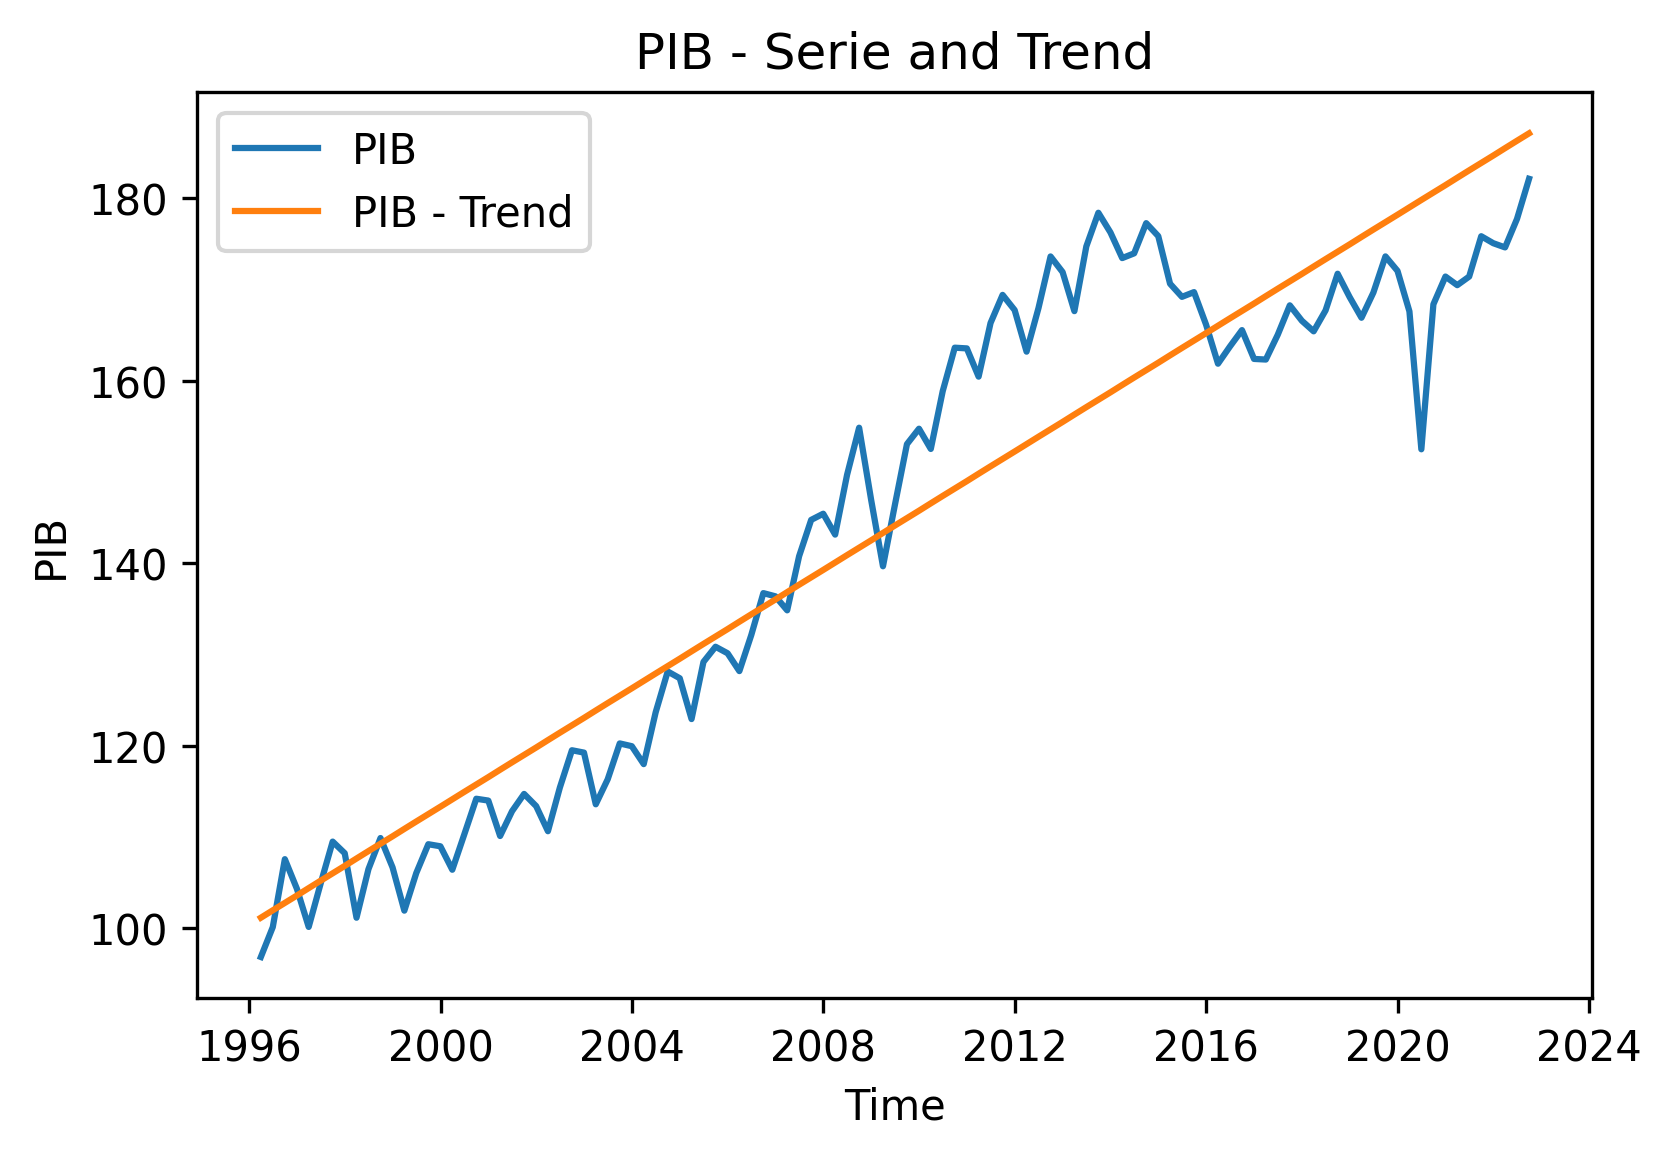

In [16]:
# Plotting PIB serie and Trend
plotSerie("PIB")

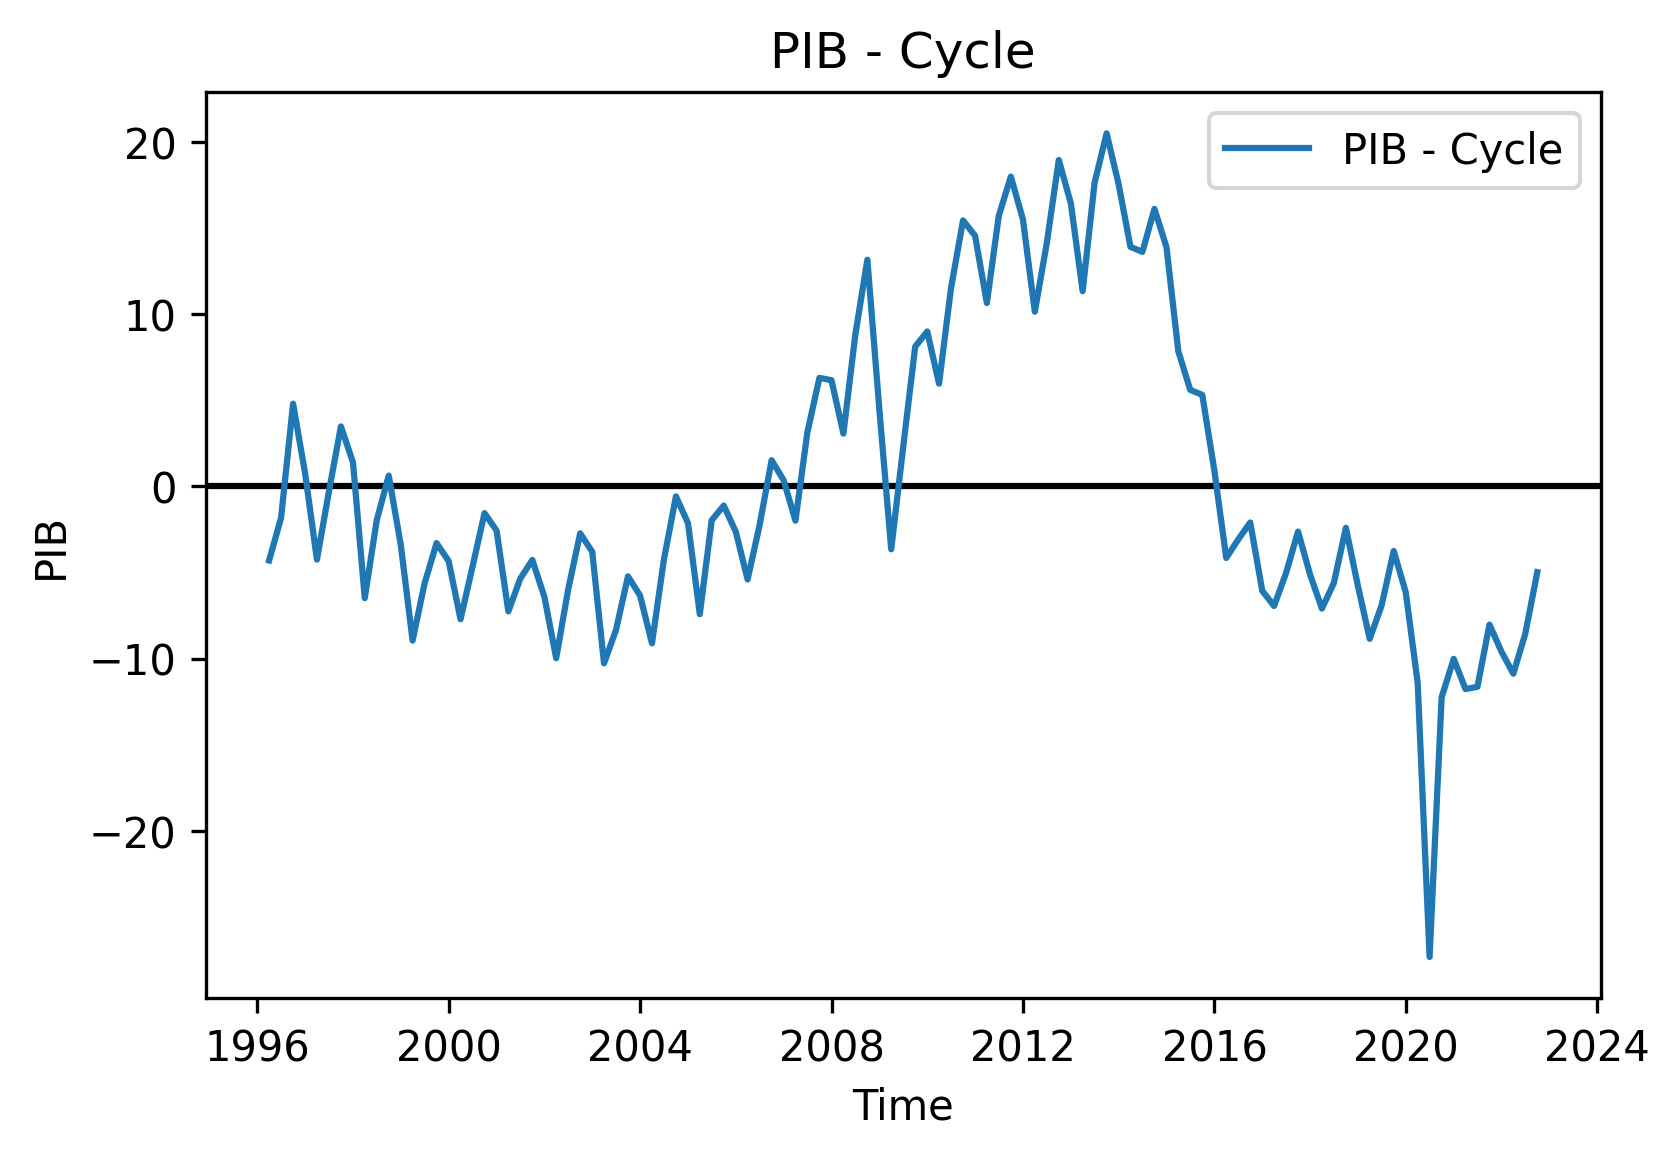

In [17]:
# Plotting PIB Cycle
plotCycle("PIB")

Consumption - Charts

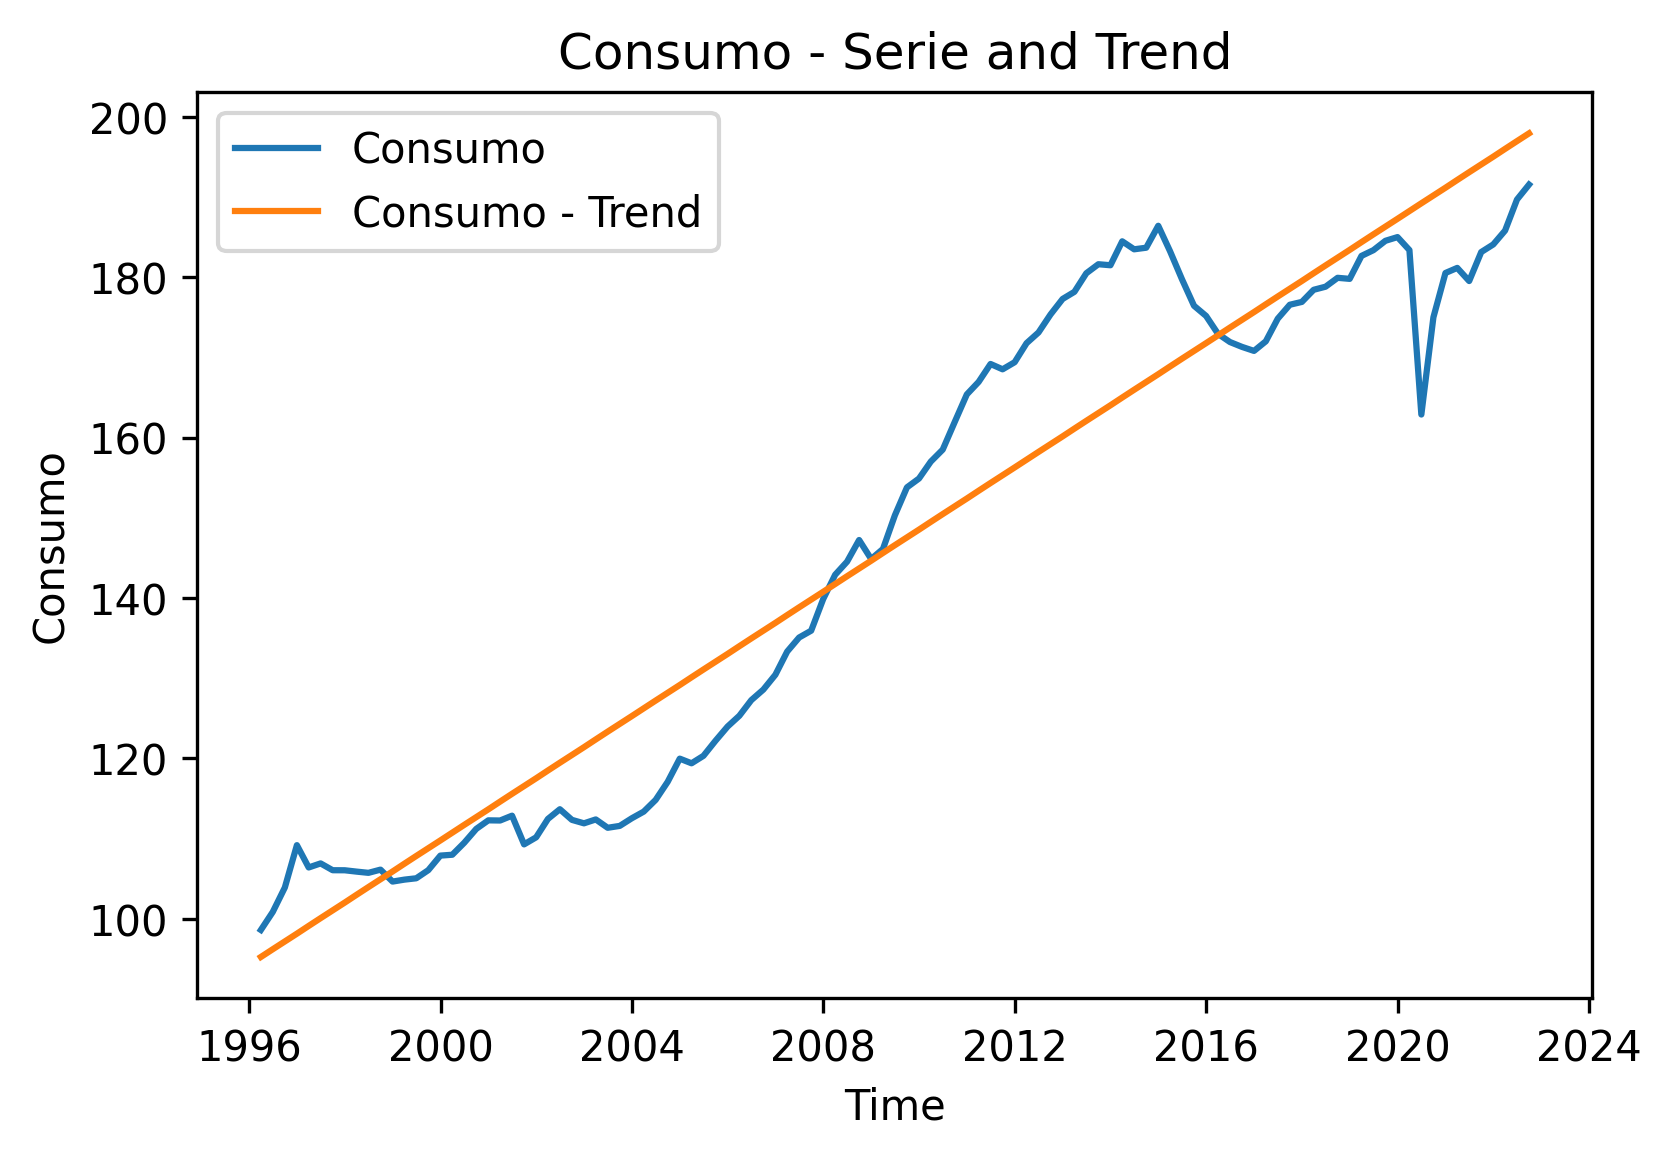

In [18]:
# Plotting Consumption serie and Trend
plotSerie("Consumo")

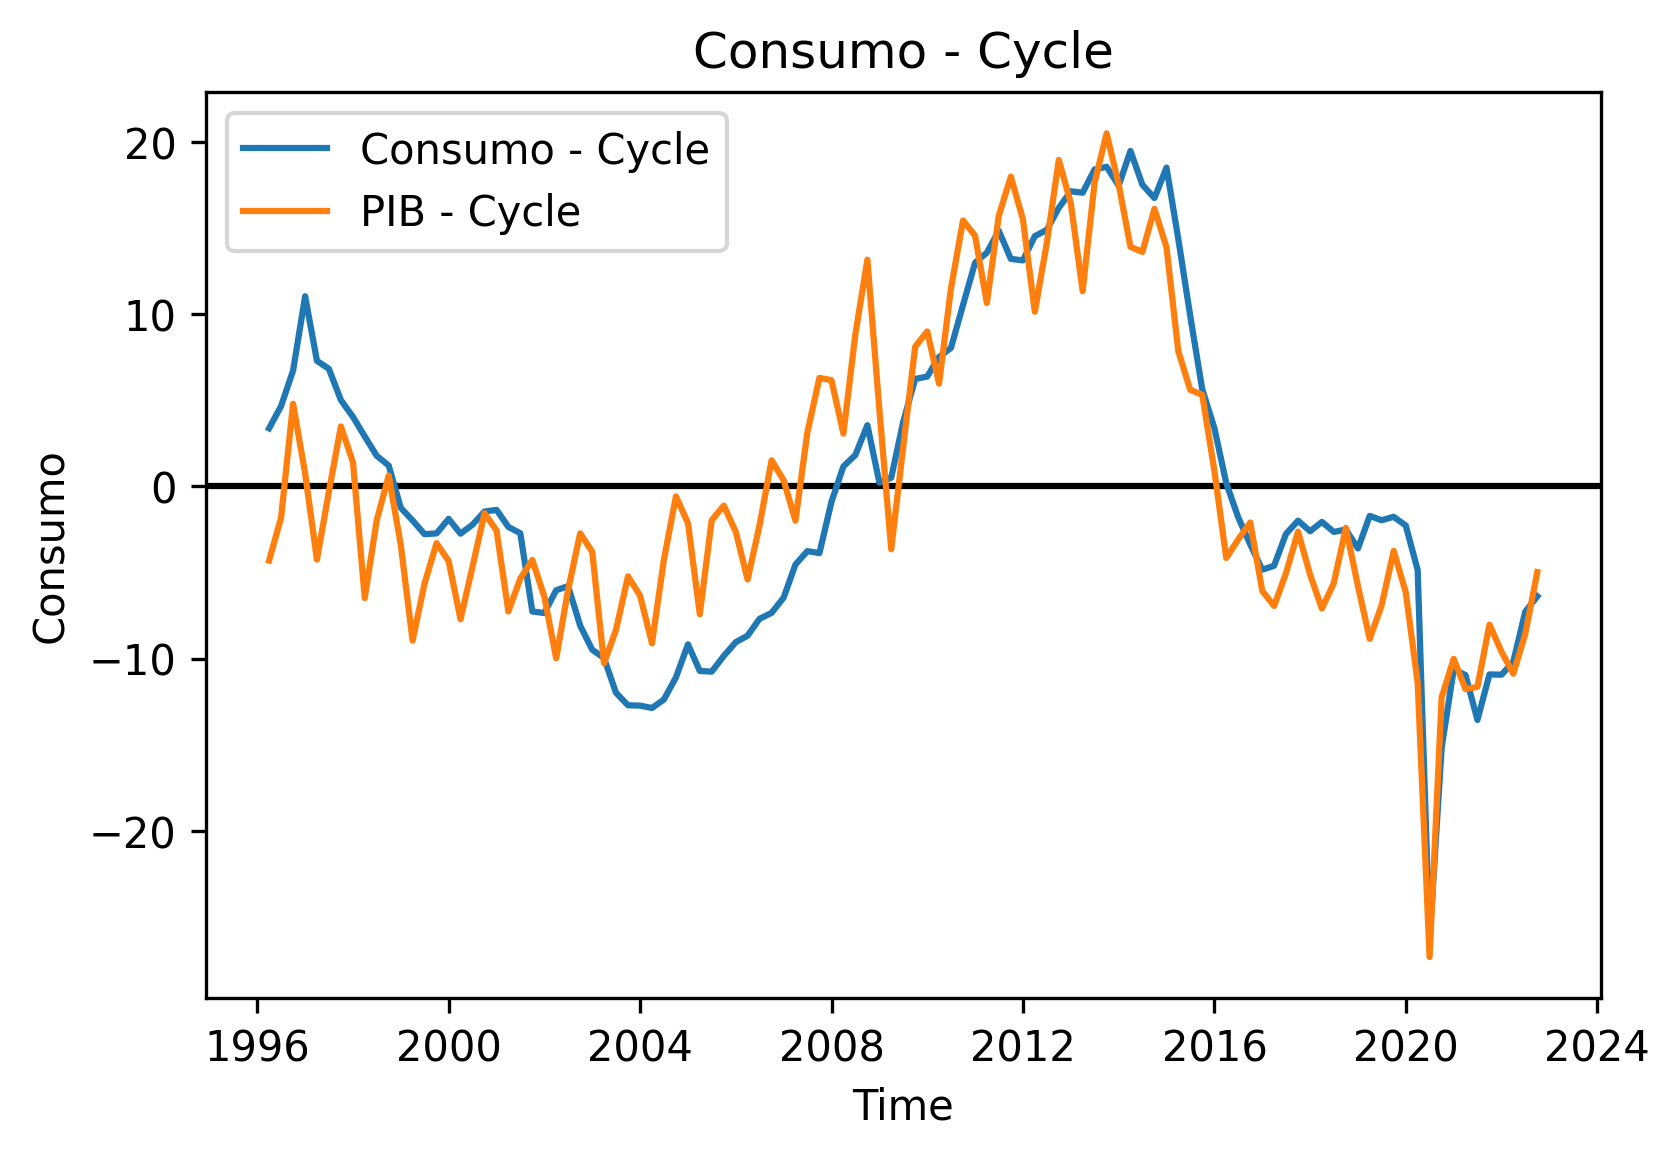

In [19]:
# Plotting Consumption Cycle
plotCycle("Consumo", pibCycle=True)

Investments - Charts

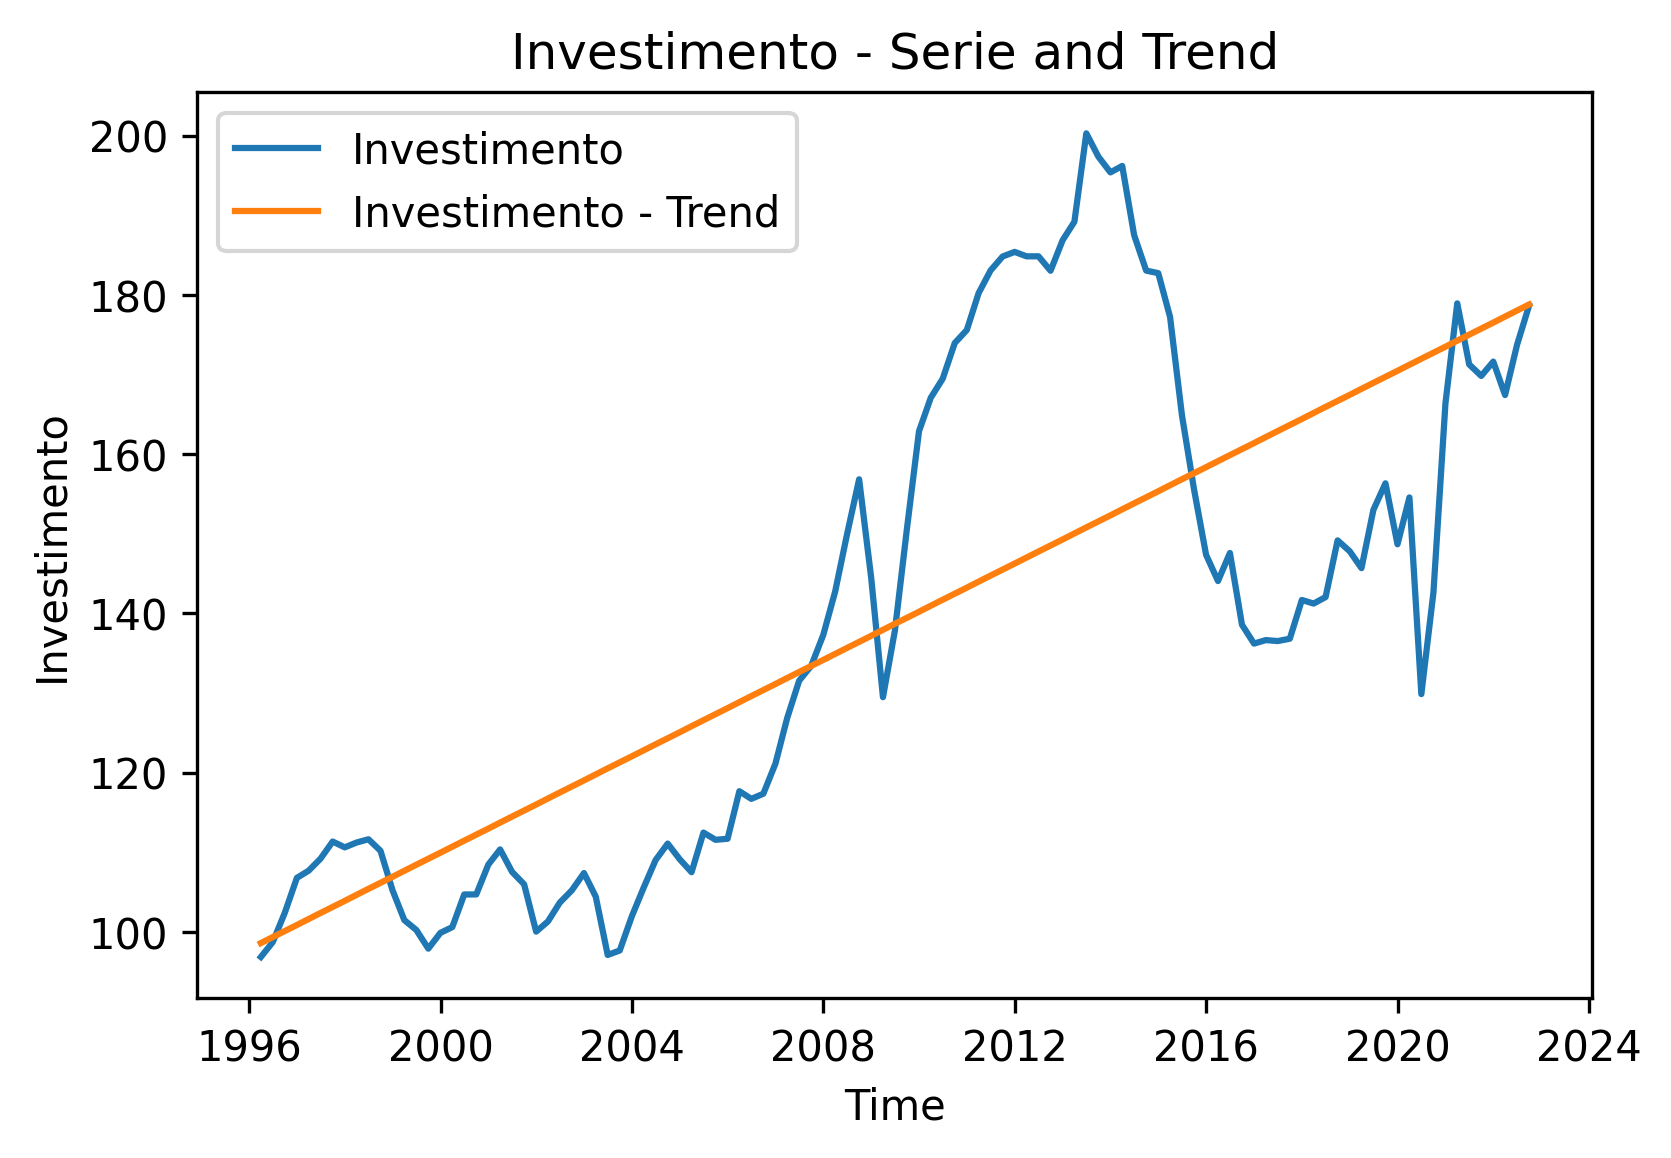

In [20]:
# Plotting Investments serie and Trend
plotSerie("Investimento")

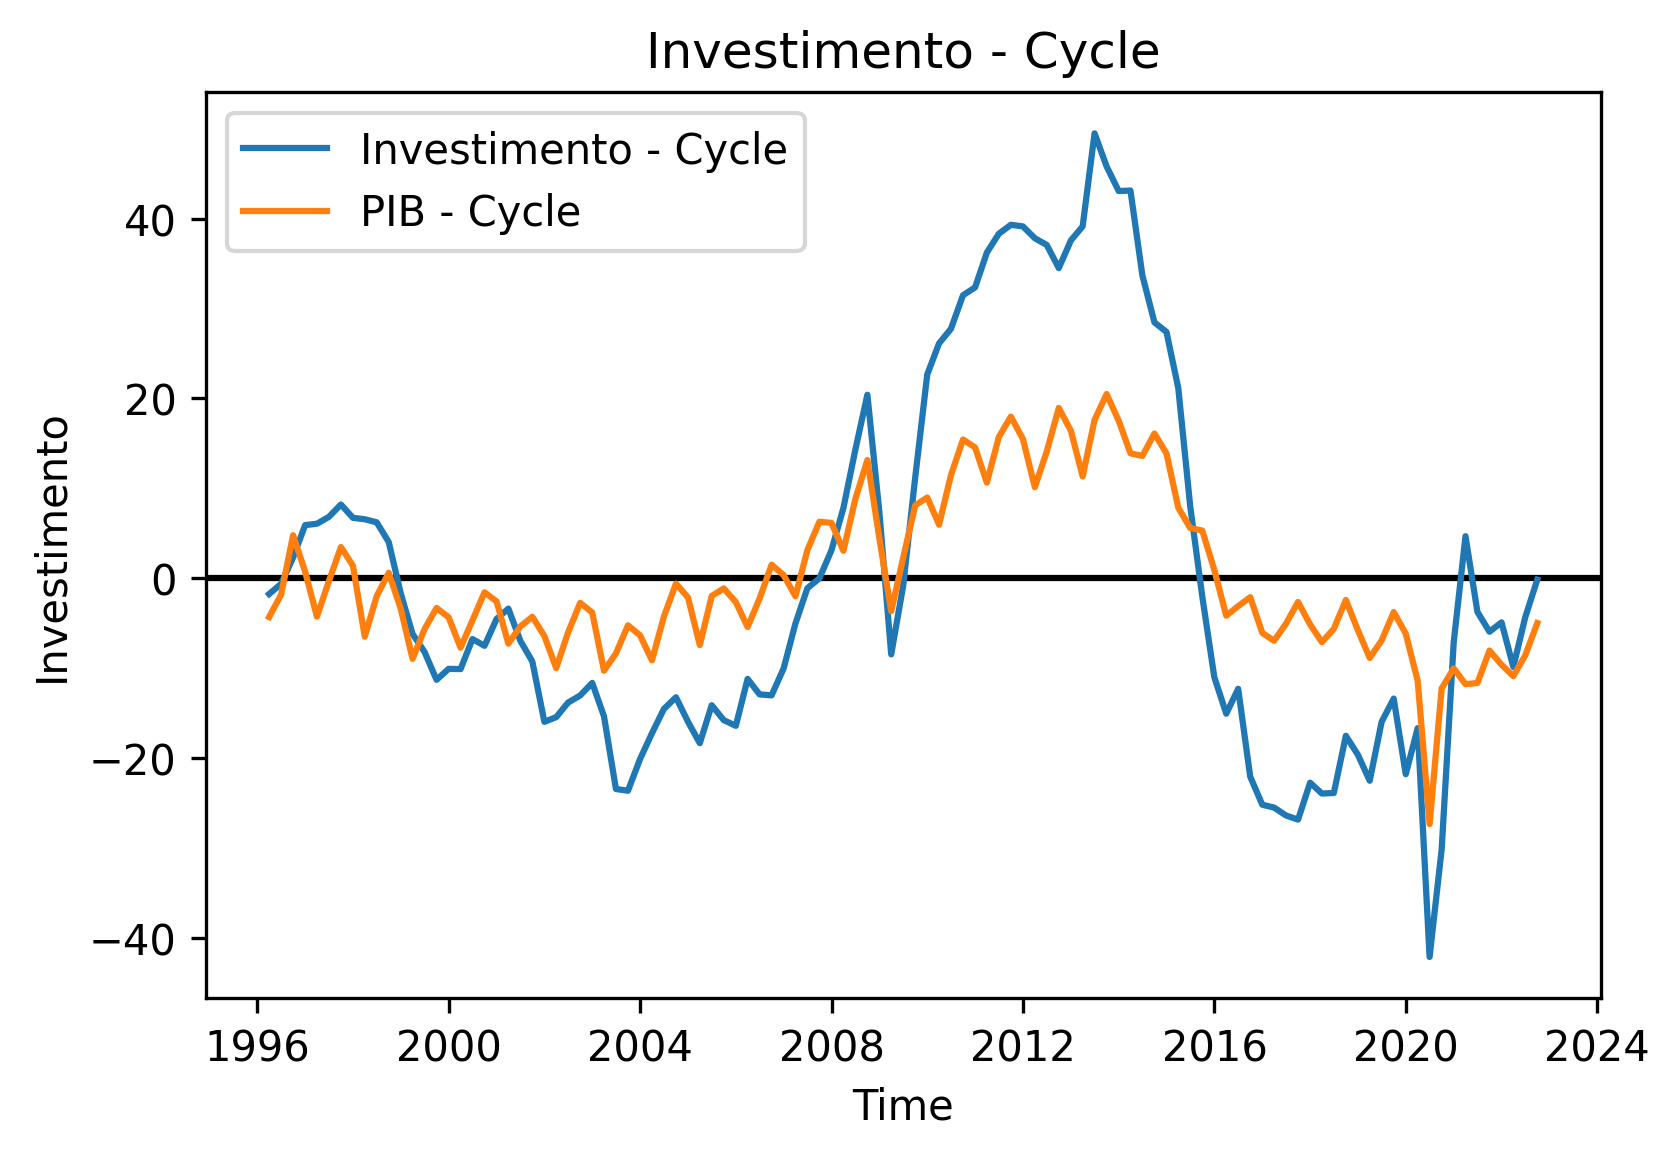

In [21]:
# Plotting Investments Cycle
plotCycle("Investimento", pibCycle=True)

Worked Hours - Charts

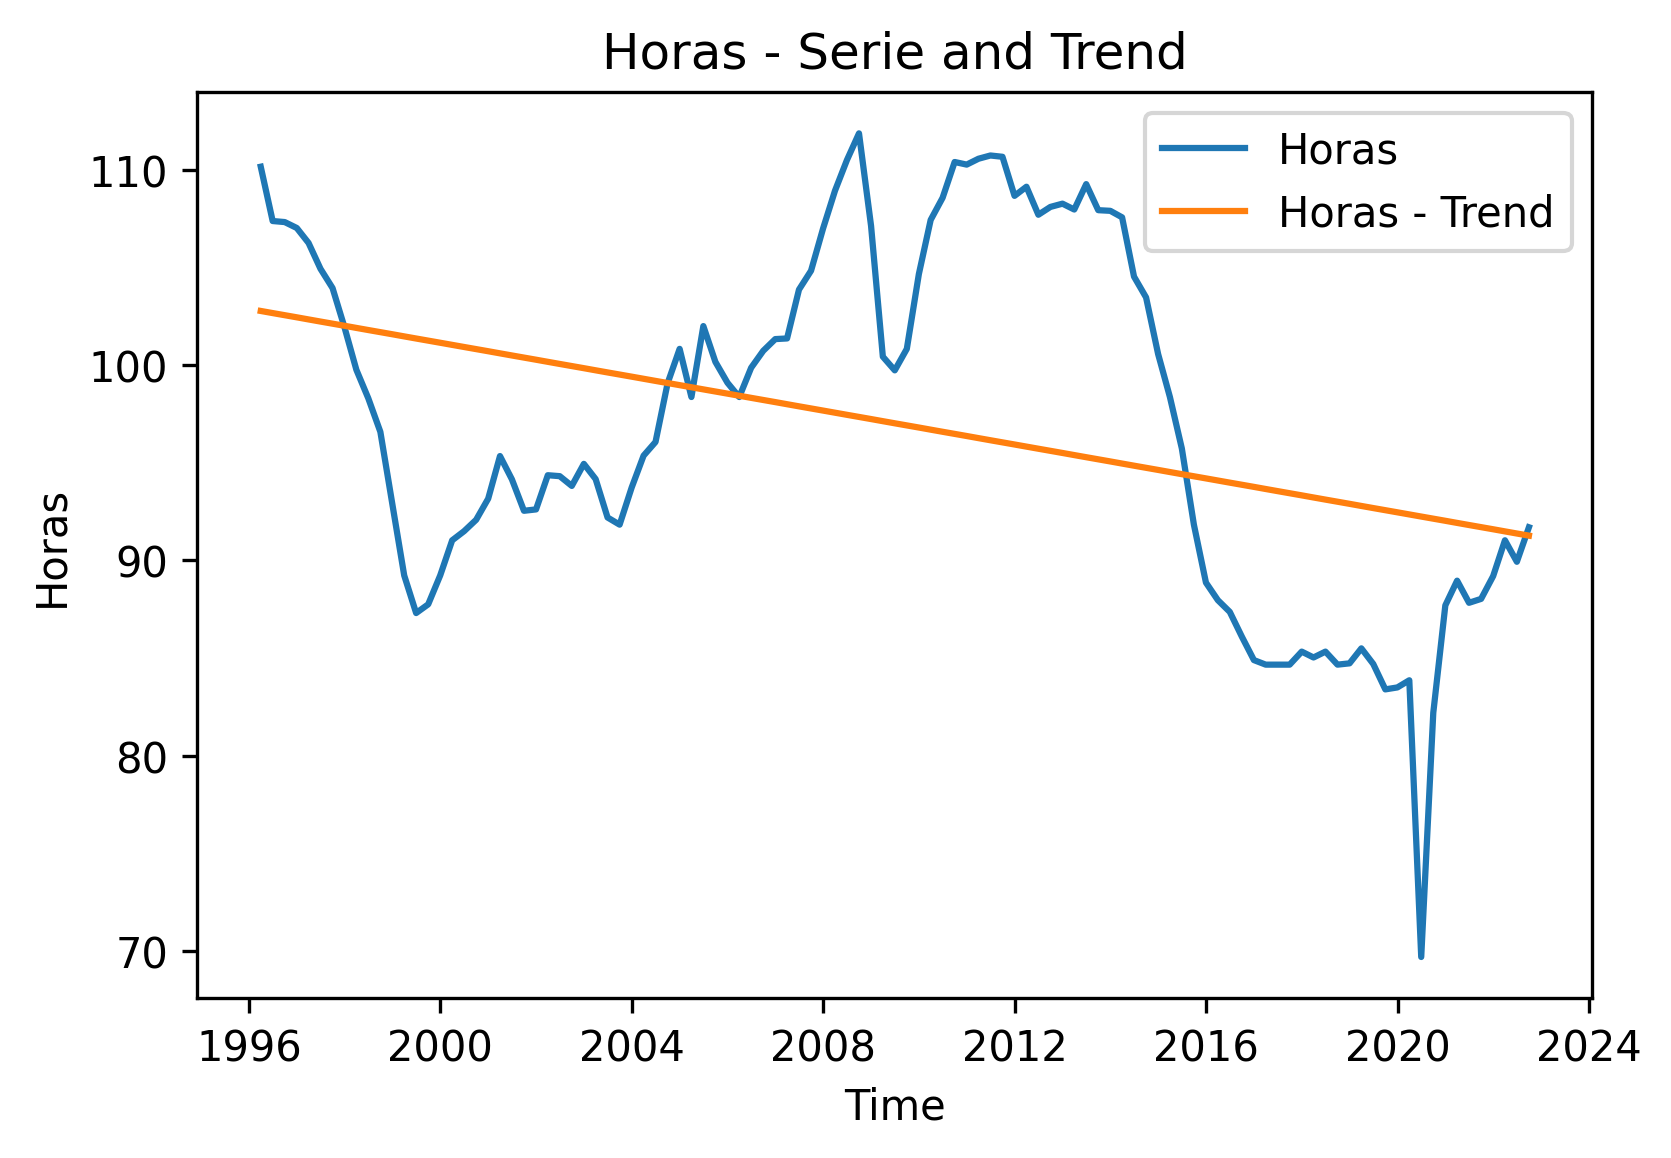

In [22]:
# Plotting Worked Hours serie and Trend
plotSerie("Horas")

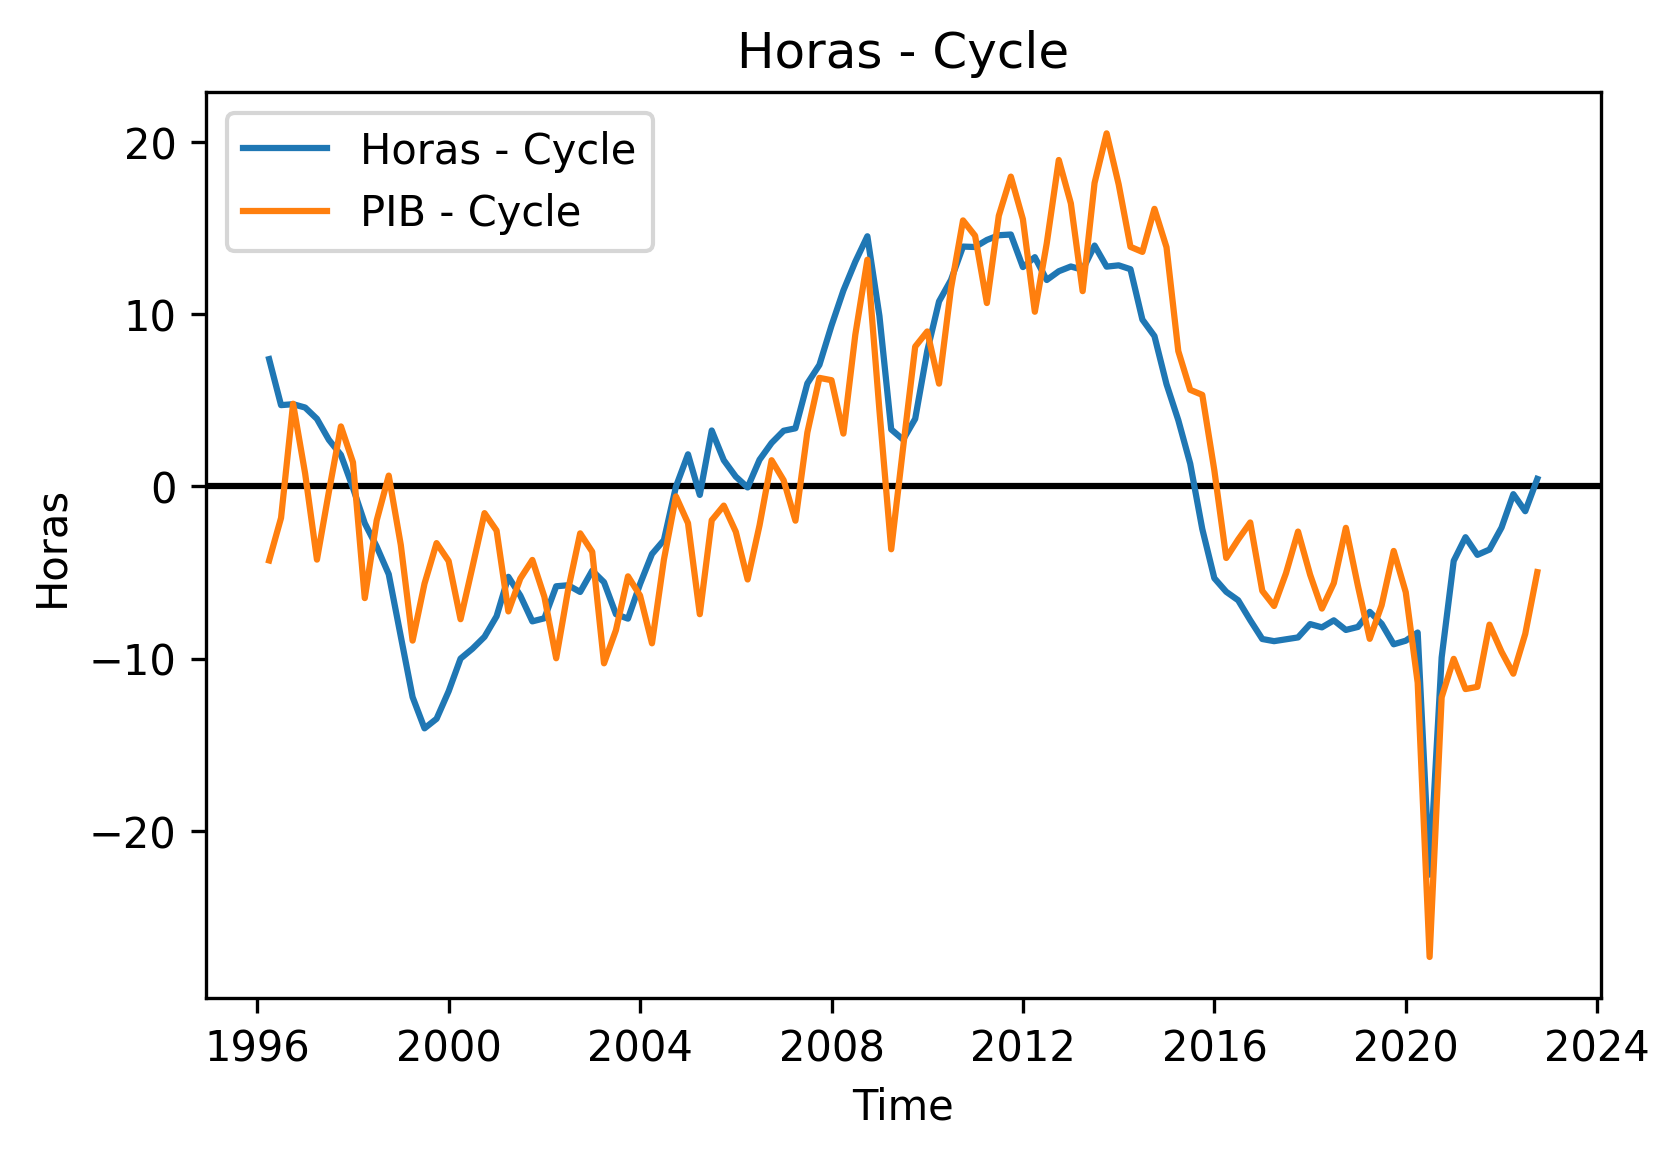

In [23]:
# Plotting Worked Hours Cycle
plotCycle("Horas", pibCycle=True)

Productivity - Charts<br>
OBS: Missing data from 2002.12 forward, so it was replace by the last data

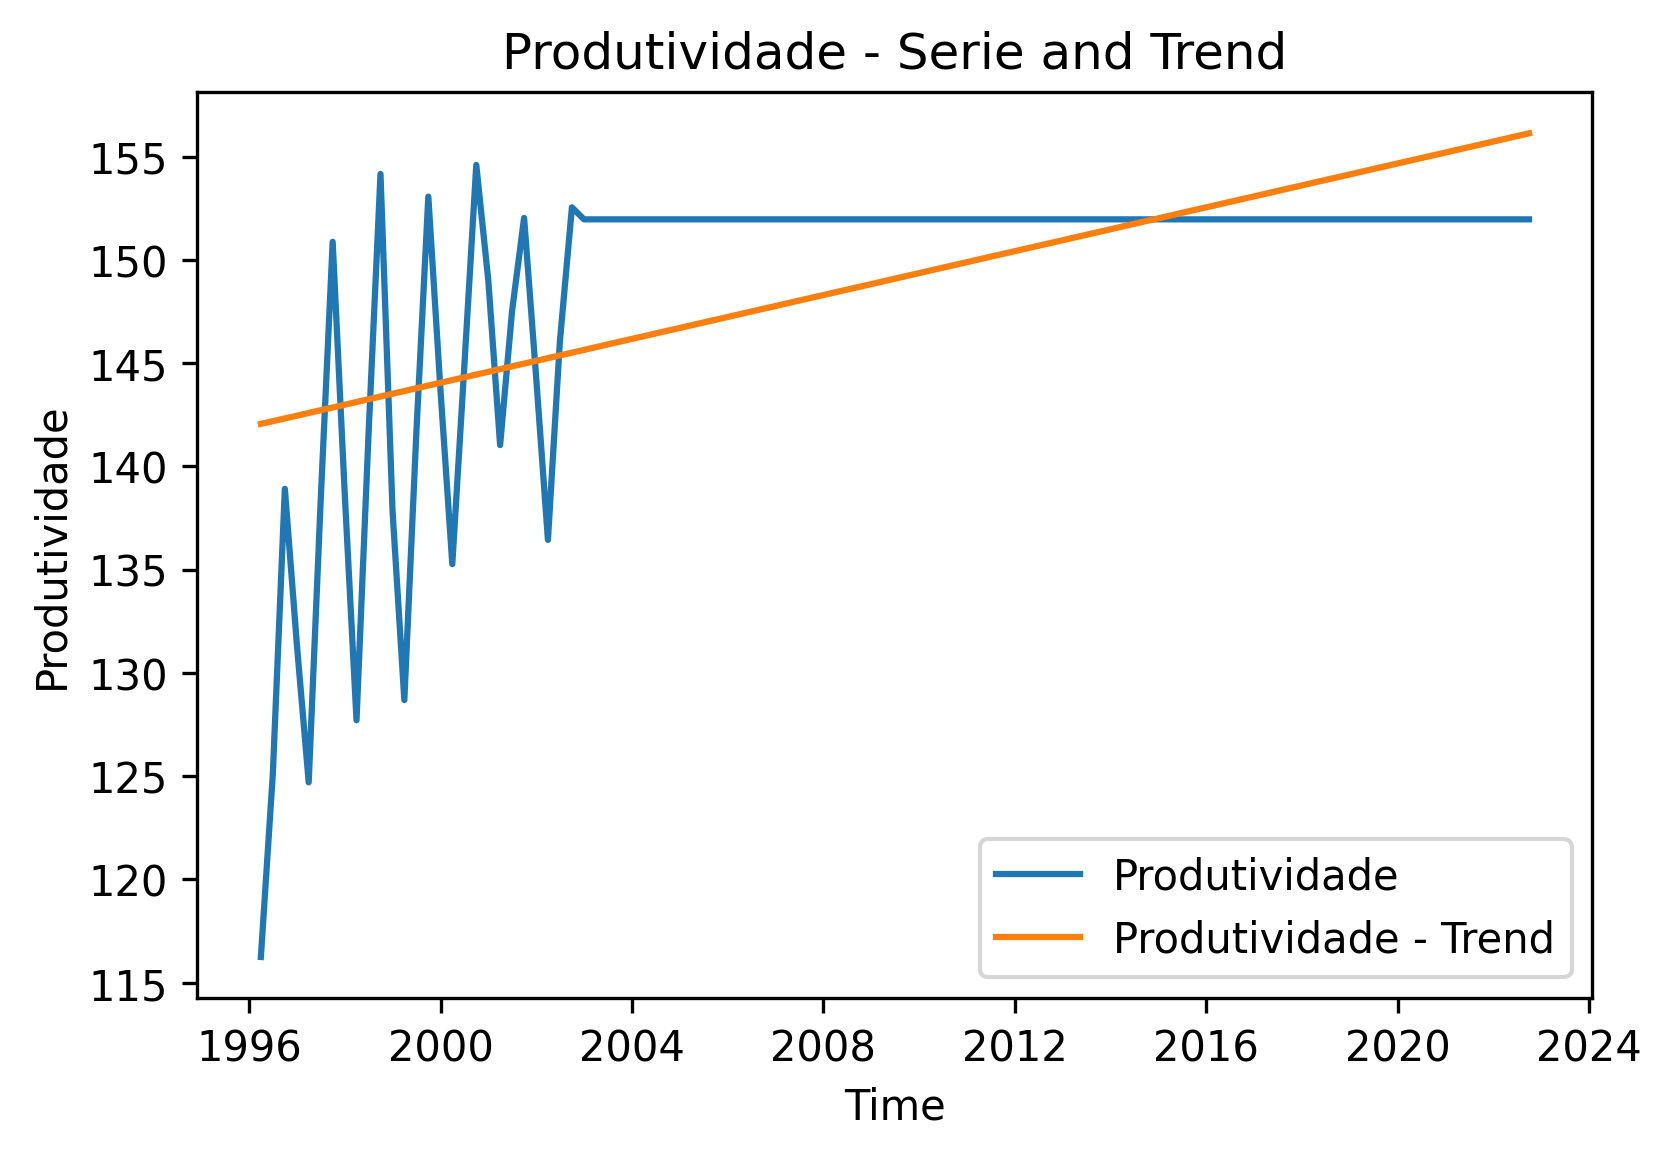

In [24]:
# Plotting Productivity serie and Trend
plotSerie("Produtividade")

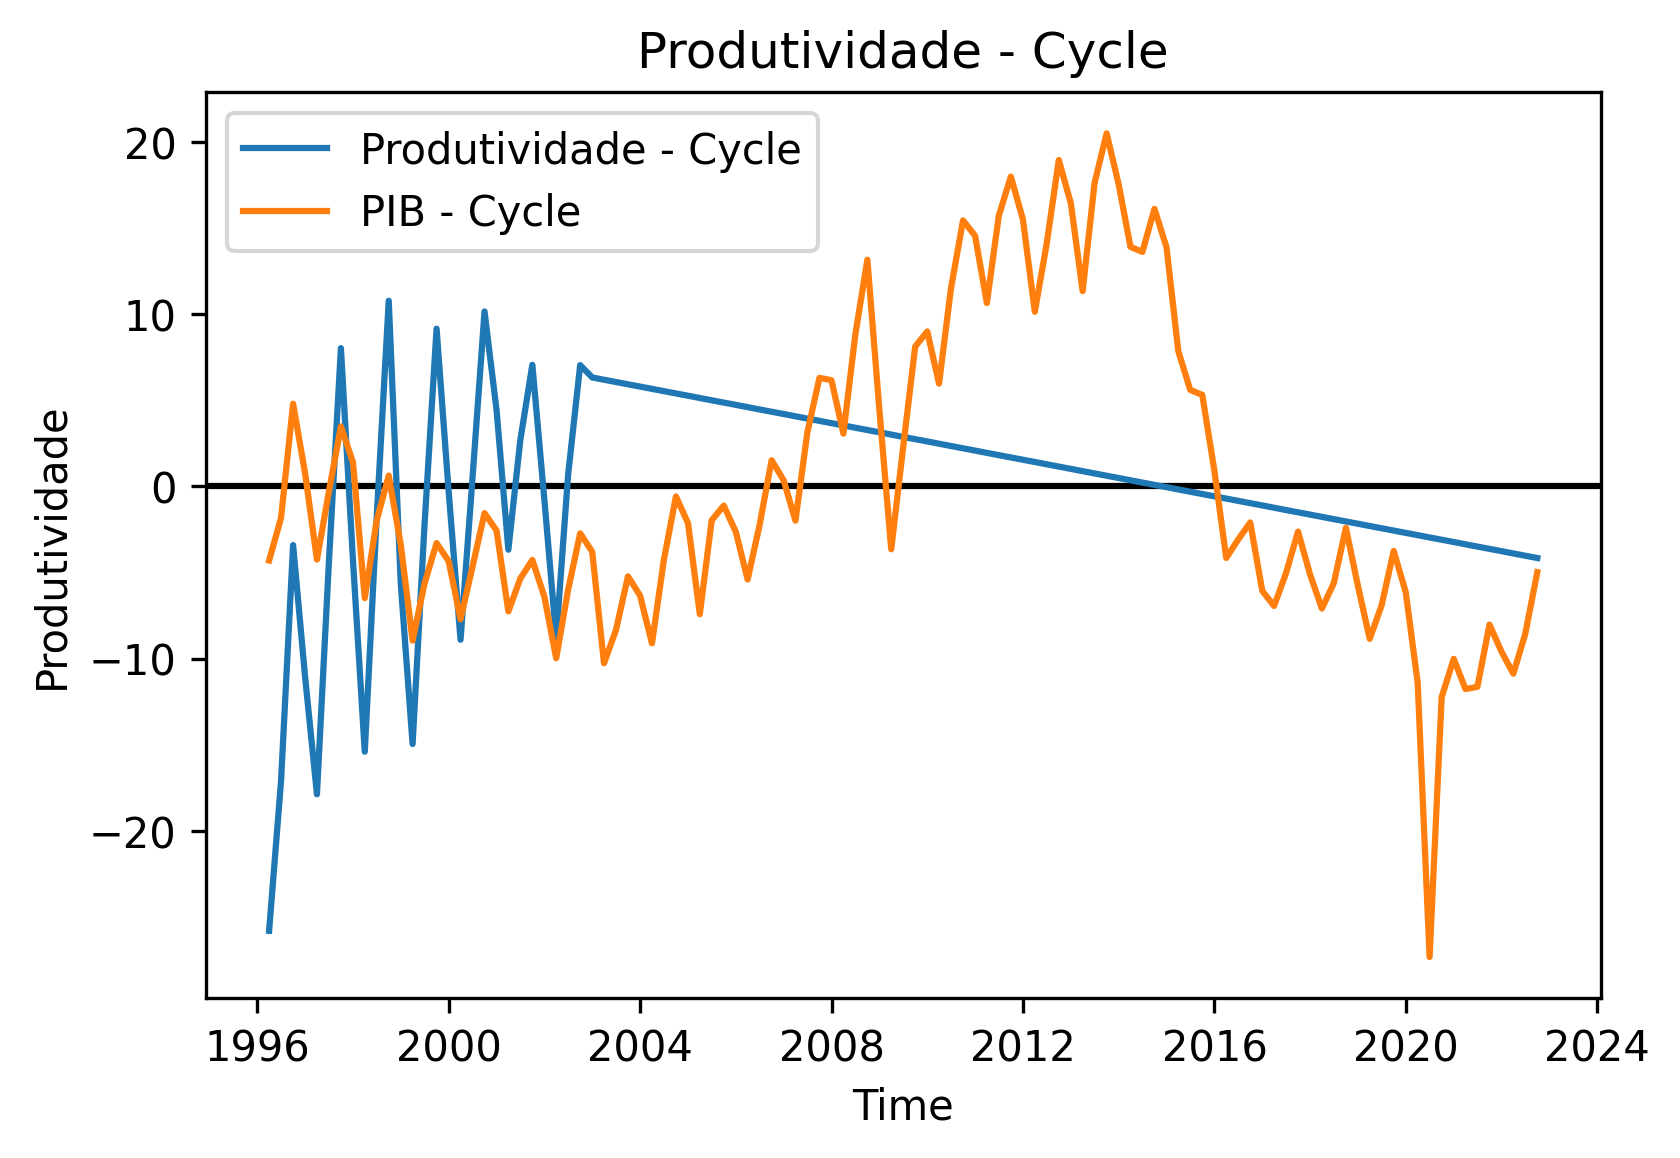

In [25]:
# Plotting Productivity Cycle
plotCycle("Produtividade", pibCycle=True)

Wage - Charts

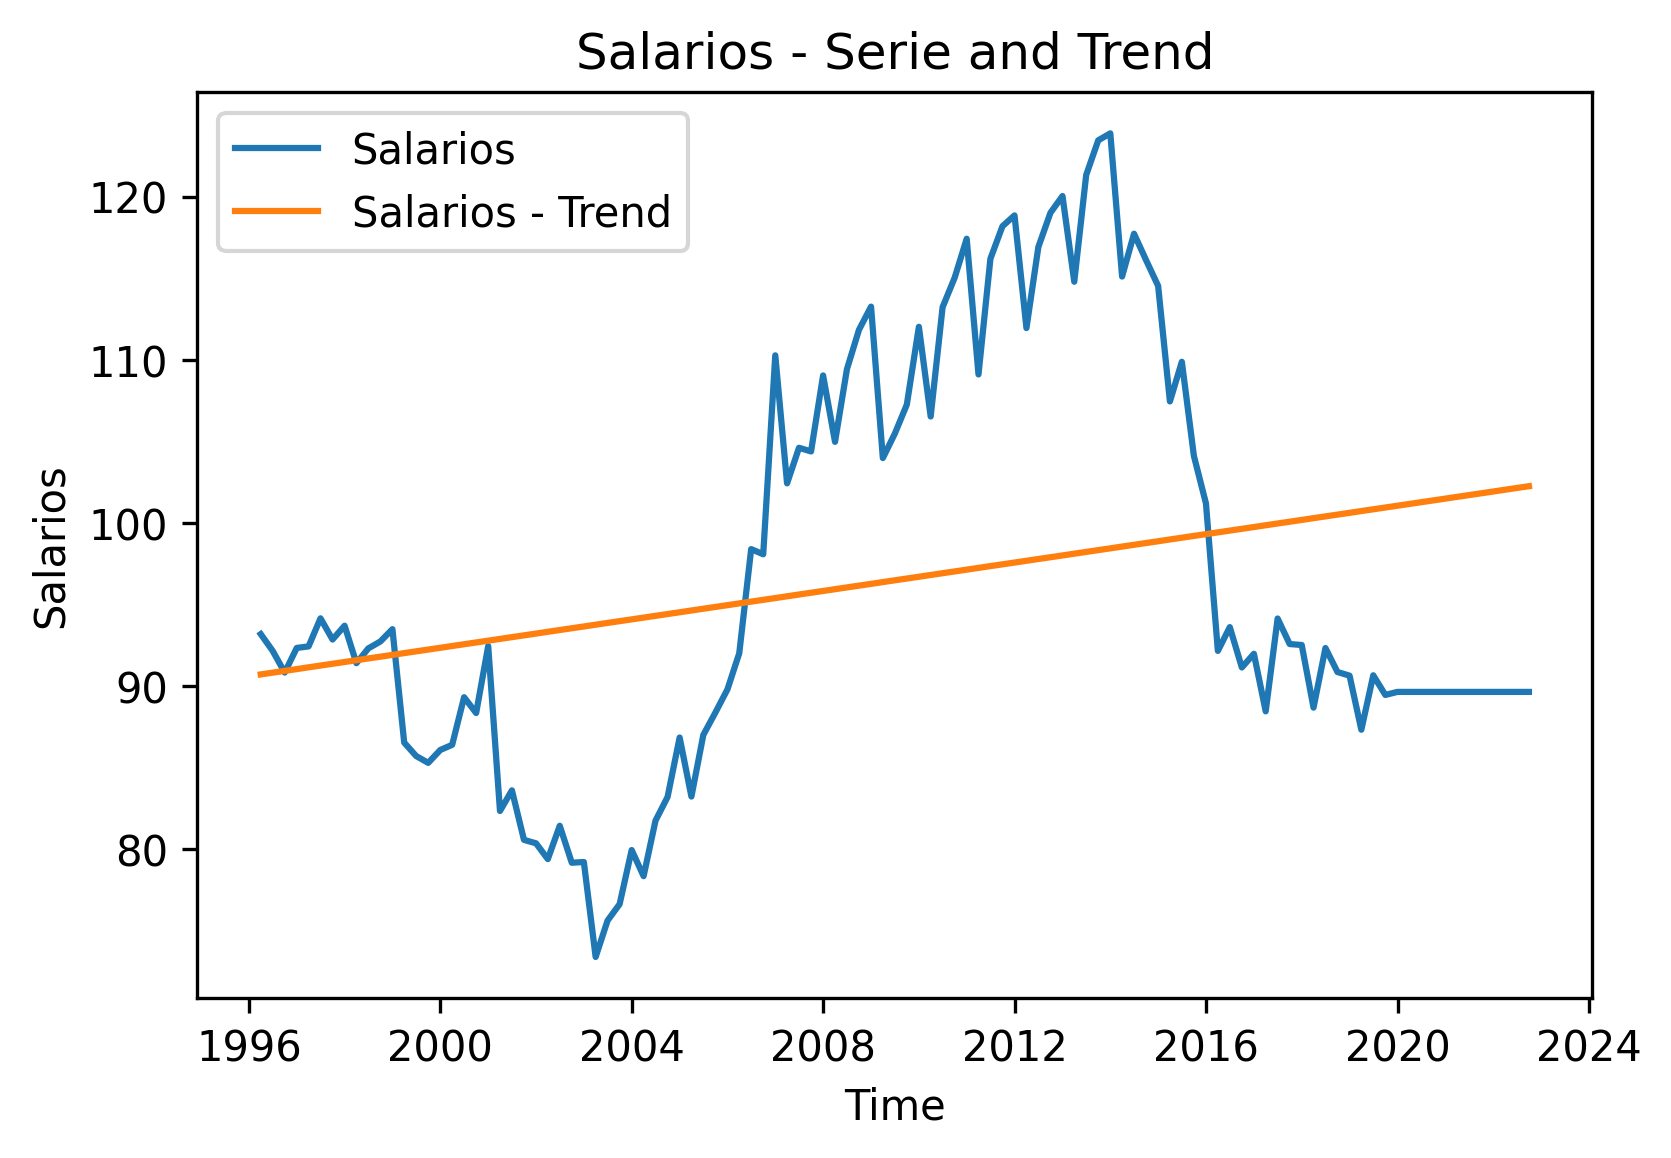

In [26]:
# Plotting Wage serie and Trend
plotSerie("Salarios")

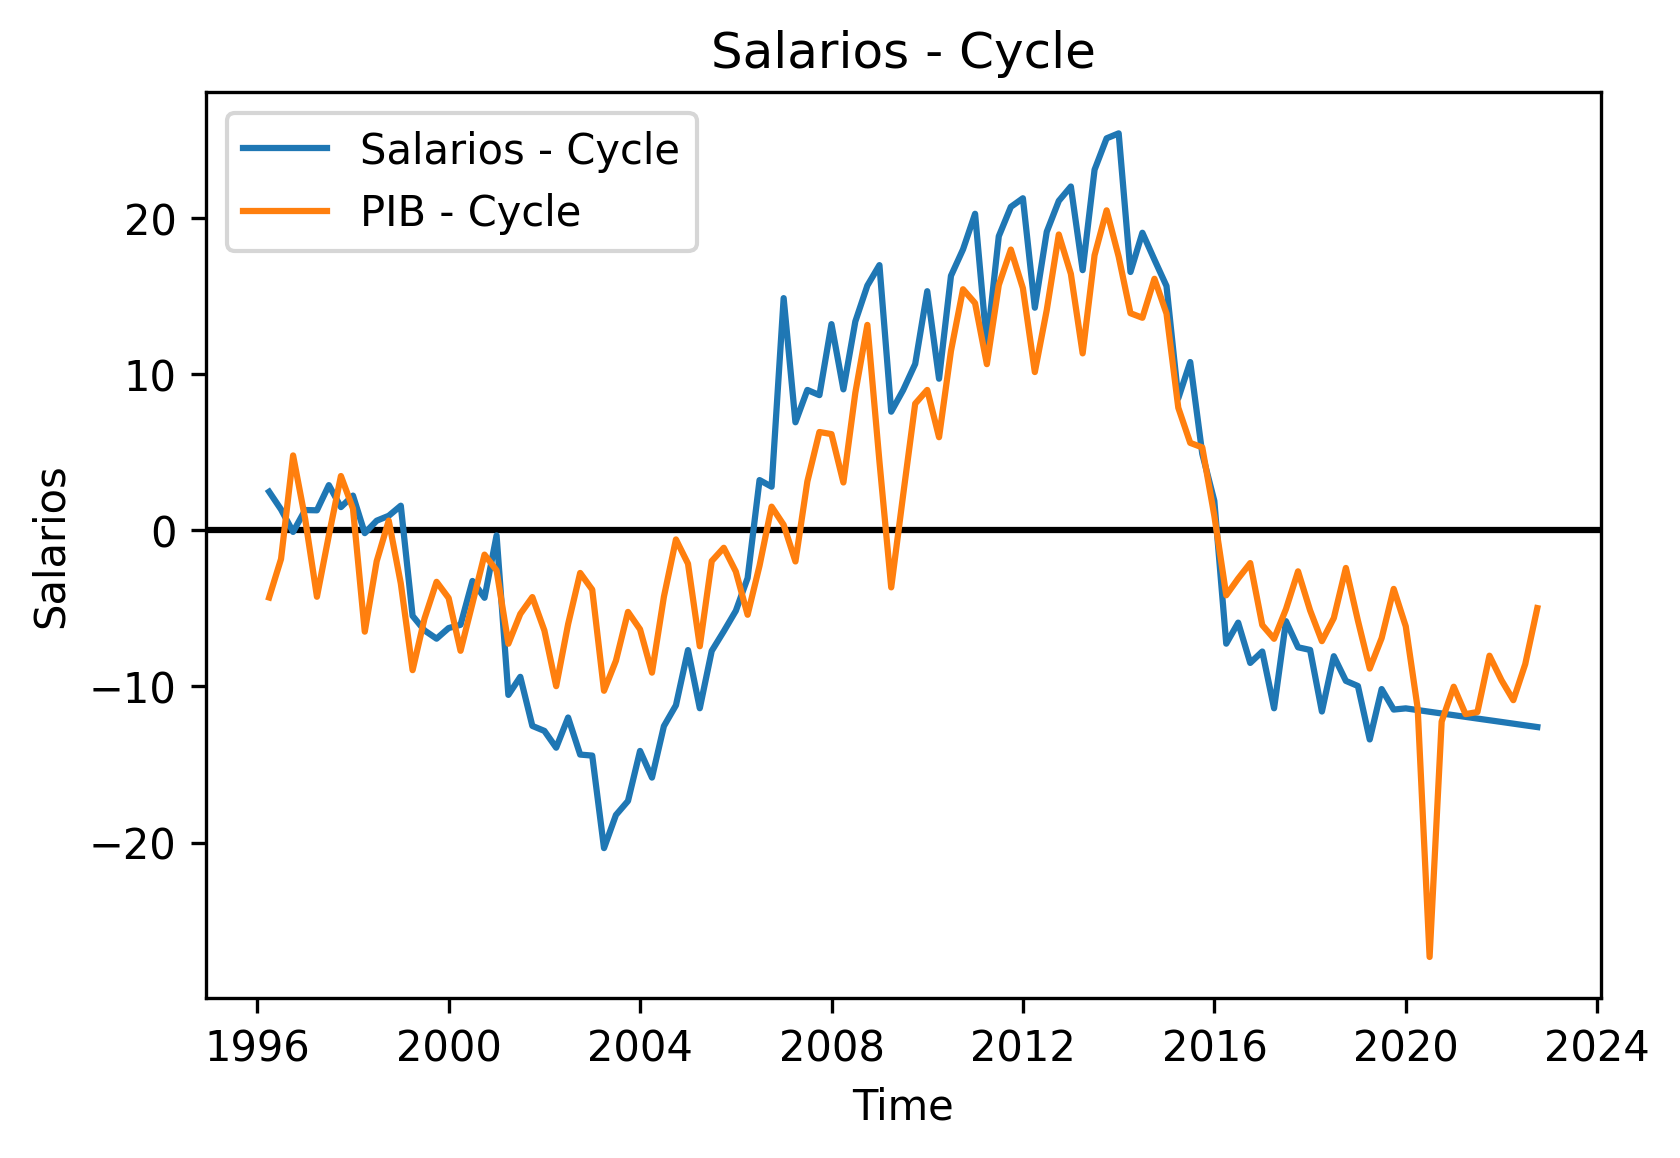

In [27]:
# Plotting Wage Cycle
plotCycle("Salarios", pibCycle=True)

b) Calcule o desvio padrão e a correlação dos componentes cíclicos das variáveis em relação ao componente cíclico do PIB. Apresente estes resultados em uma tabela e discuta os fatos estilizados.

In [28]:
# Insetindo relative standart deviation in table
coefTable["Rstd_cycle(PIB)"] = [
                               finalBase["PIB-Cycle"].std()/finalBase["PIB-Cycle"].std(),
                               finalBase["Consumo-Cycle"].std()/finalBase["PIB-Cycle"].std(),
                               finalBase["Governo-Cycle"].std()/finalBase["PIB-Cycle"].std(),
                               finalBase["Investimento-Cycle"].std()/finalBase["PIB-Cycle"].std(),
                               finalBase["Horas-Cycle"].std()/finalBase["PIB-Cycle"].std(),
                               finalBase["Salarios-Cycle"].std()/finalBase["PIB-Cycle"].std(),
                               finalBase["Produtividade-Cycle"].std()/finalBase["PIB-Cycle"].std(),
                              ]

In [29]:
# Inserting pib correlations in coefTable
coefTable["Corr_cycle(PIB)"] = [
                                     finalBase["PIB-Cycle"].corr(finalBase["PIB-Cycle"]),
                                     finalBase["Consumo-Cycle"].corr(finalBase["PIB-Cycle"]),
                                     finalBase["Governo-Cycle"].corr(finalBase["PIB-Cycle"]),
                                     finalBase["Investimento-Cycle"].corr(finalBase["PIB-Cycle"]),
                                     finalBase["Horas-Cycle"].corr(finalBase["PIB-Cycle"]),
                                     finalBase["Salarios-Cycle"].corr(finalBase["PIB-Cycle"]),
                                     finalBase["Produtividade-Cycle"].corr(finalBase["PIB-Cycle"])
                                    ]

In [30]:
# Priting table
coefTable

,B0,B1,R2,P-Value (%),Rstd_cycle(PIB),Corr_cycle(PIB)
Variavel,,,,,,
PIB,100.33392,0.81109,0.88769,"(0.0, 0.0)",1.000000,1.000000
Consumo,94.28845,0.96856,0.90861,"(0.0, 0.0)",1.064723,0.871031
Governo,98.78898,0.57165,0.88644,"(0.0, 0.0)",0.709202,0.876127
Investimento,97.83082,0.75656,0.55812,"(0.0, 0.0)",2.333321,0.885170
Horas,102.88227,-0.10851,0.13524,"(0.0, 0.00975)",0.951086,0.854277
Salarios,90.61168,0.10879,0.07009,"(0.0, 0.58565)",1.373433,0.905962
Produtividade,141.92391,0.13273,0.34179,"(0.0, 0.0)",0.638444,0.231873


c) Discuta como um modelo de ciclos econômicos reais (RBC) movido por choques na PTF, como visto em sala de aula, poderia explicar os fatos estilizados observados na letra b.

d) Obtenha o Índice encadeado dessazonalizado do consumo da administração pública no sítio do IPEADATA. Utilizando os mesmos procedimentos da letra (a) obtenha o componente cíclico dos gastos governamentais e faça um gráfico de dispersão entre os desvios do PIB de sua tendência (obtido na letra a) e os desvios dos gastos governamentais em relação à sua tendência de longo prazo. Os gastos governamentais no Brasil aparentam ser procíclicos, contracíclicos ou acíclicos?

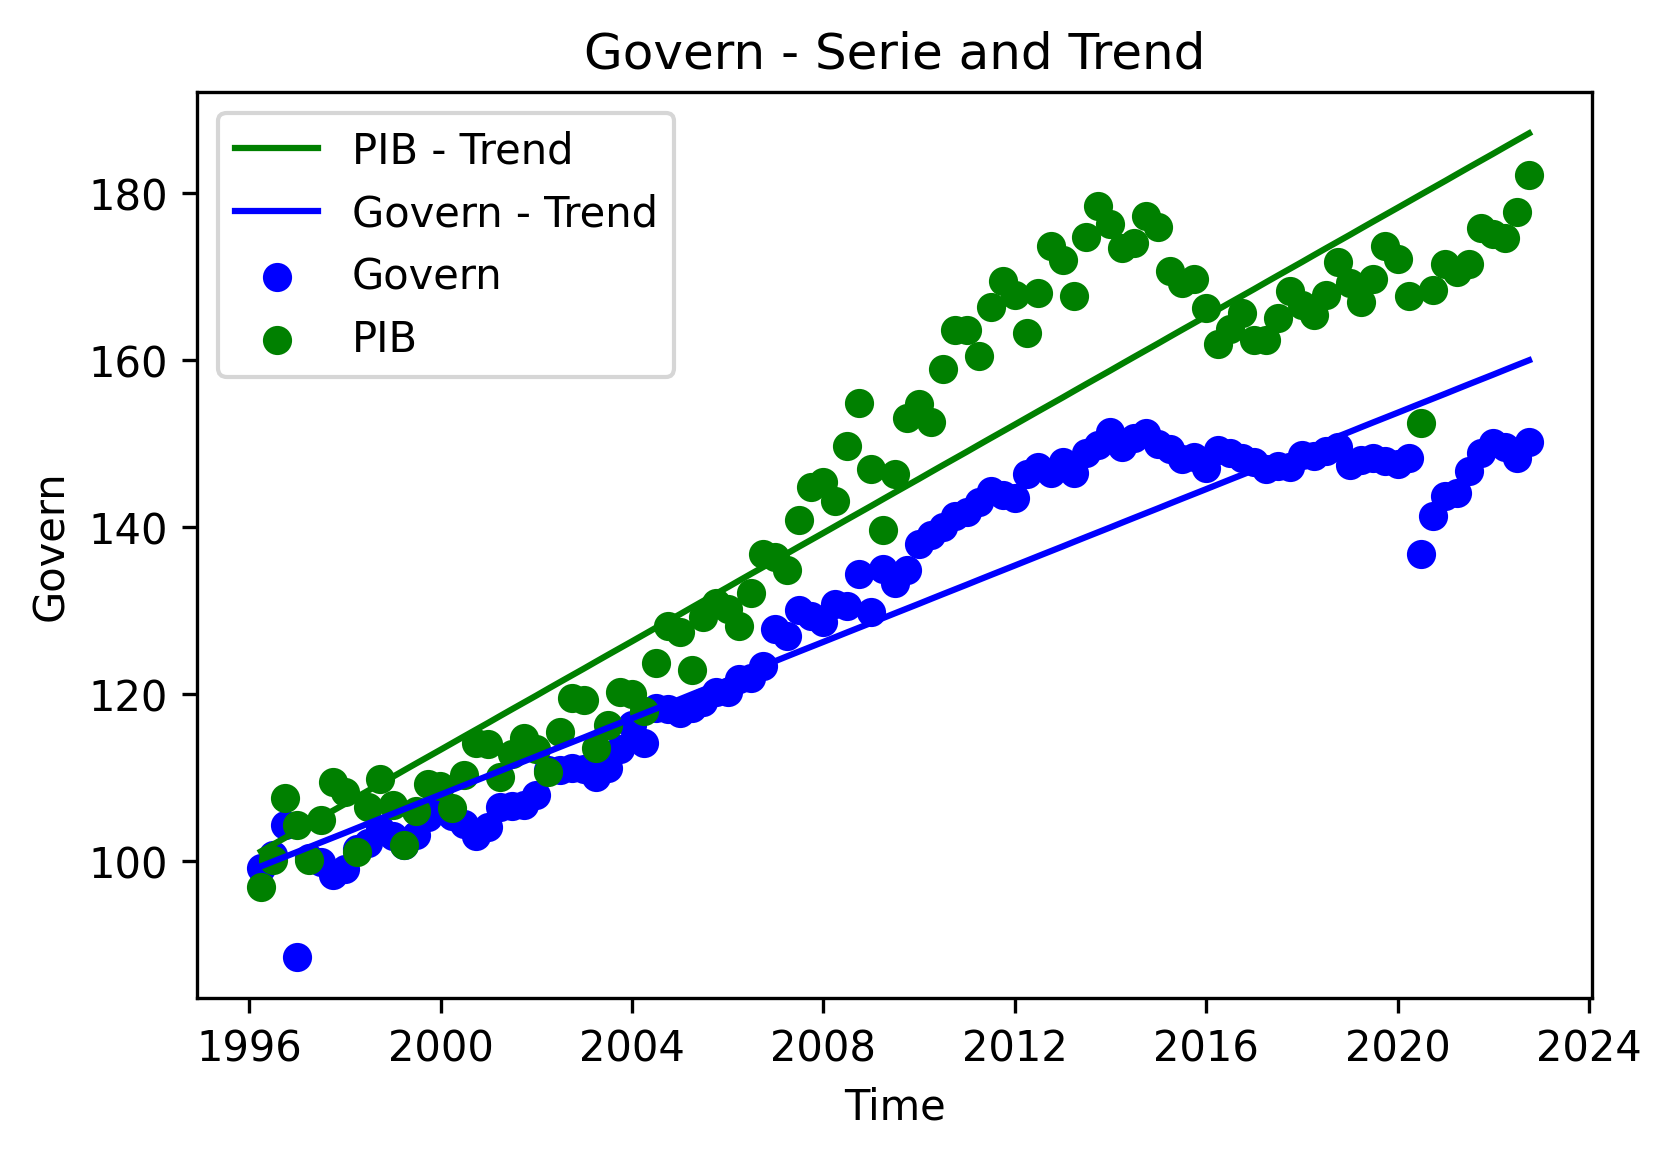

In [31]:
# Plotting Govern serie and Trend
fig = plt.figure(dpi=300)
plt.title("Govern - Serie and Trend")
plt.xlabel("Time")
plt.ylabel("Govern")
plt.scatter(finalBase.index,finalBase["Governo"], label="Govern", color="blue")
plt.scatter(finalBase.index,finalBase["PIB"], label="PIB", color="green")
plt.plot(finalBase.index,(coefTable.loc["PIB"]["B0"]+coefTable.loc["PIB"]["B1"]*np.arange(1,len(finalBase)+1,1)), label="PIB - Trend", color="green")
plt.plot(finalBase.index,(coefTable.loc["Governo"]["B0"]+coefTable.loc["Governo"]["B1"]*np.arange(1,len(finalBase)+1,1)), label="Govern - Trend", color="blue")
plt.legend()
plt.show()

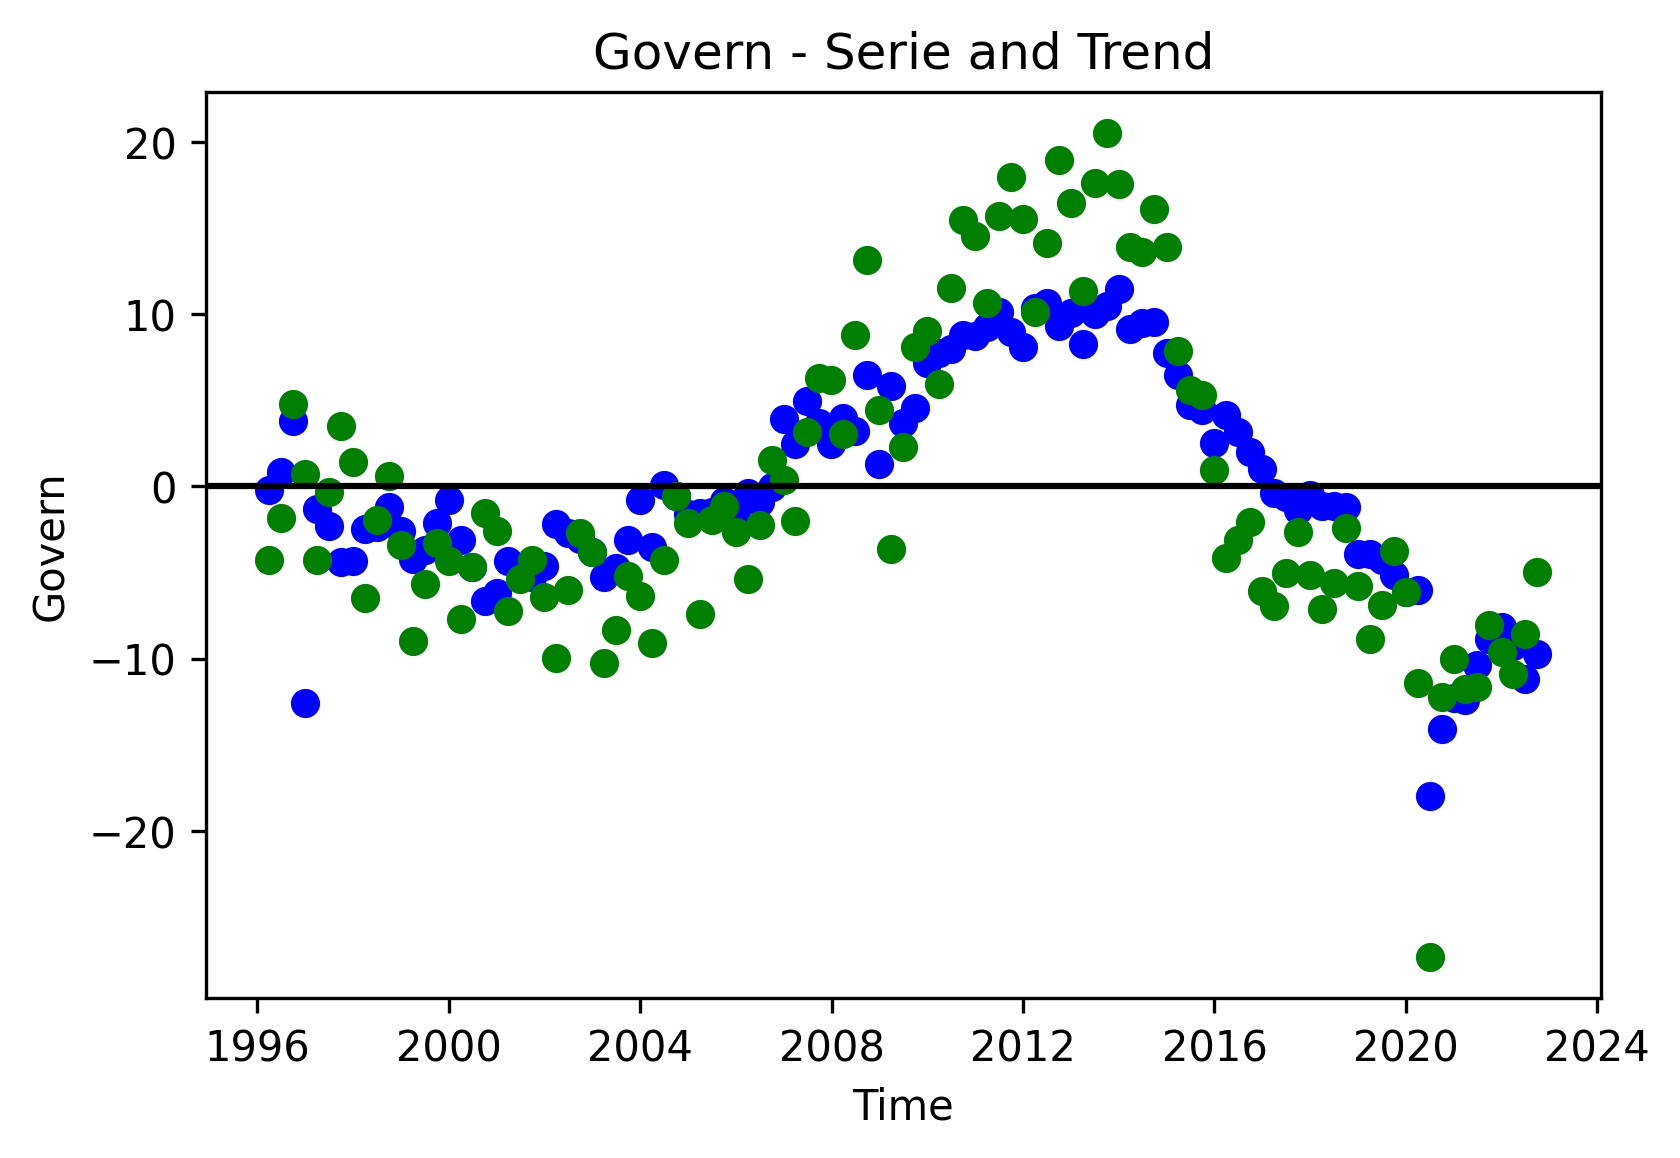

In [32]:
# Plotting Govern Cycle
fig = plt.figure(dpi=300)
plt.title("Govern - Serie and Trend")
plt.xlabel("Time")
plt.ylabel("Govern")
plt.axhline(0,color="black")
plt.scatter(finalBase.index,finalBase["Governo-Cycle"], label="Govern - Cycle", color="blue")
plt.scatter(finalBase.index,finalBase["PIB-Cycle"], label="PIB - Cycle", color="green")
plt.show()

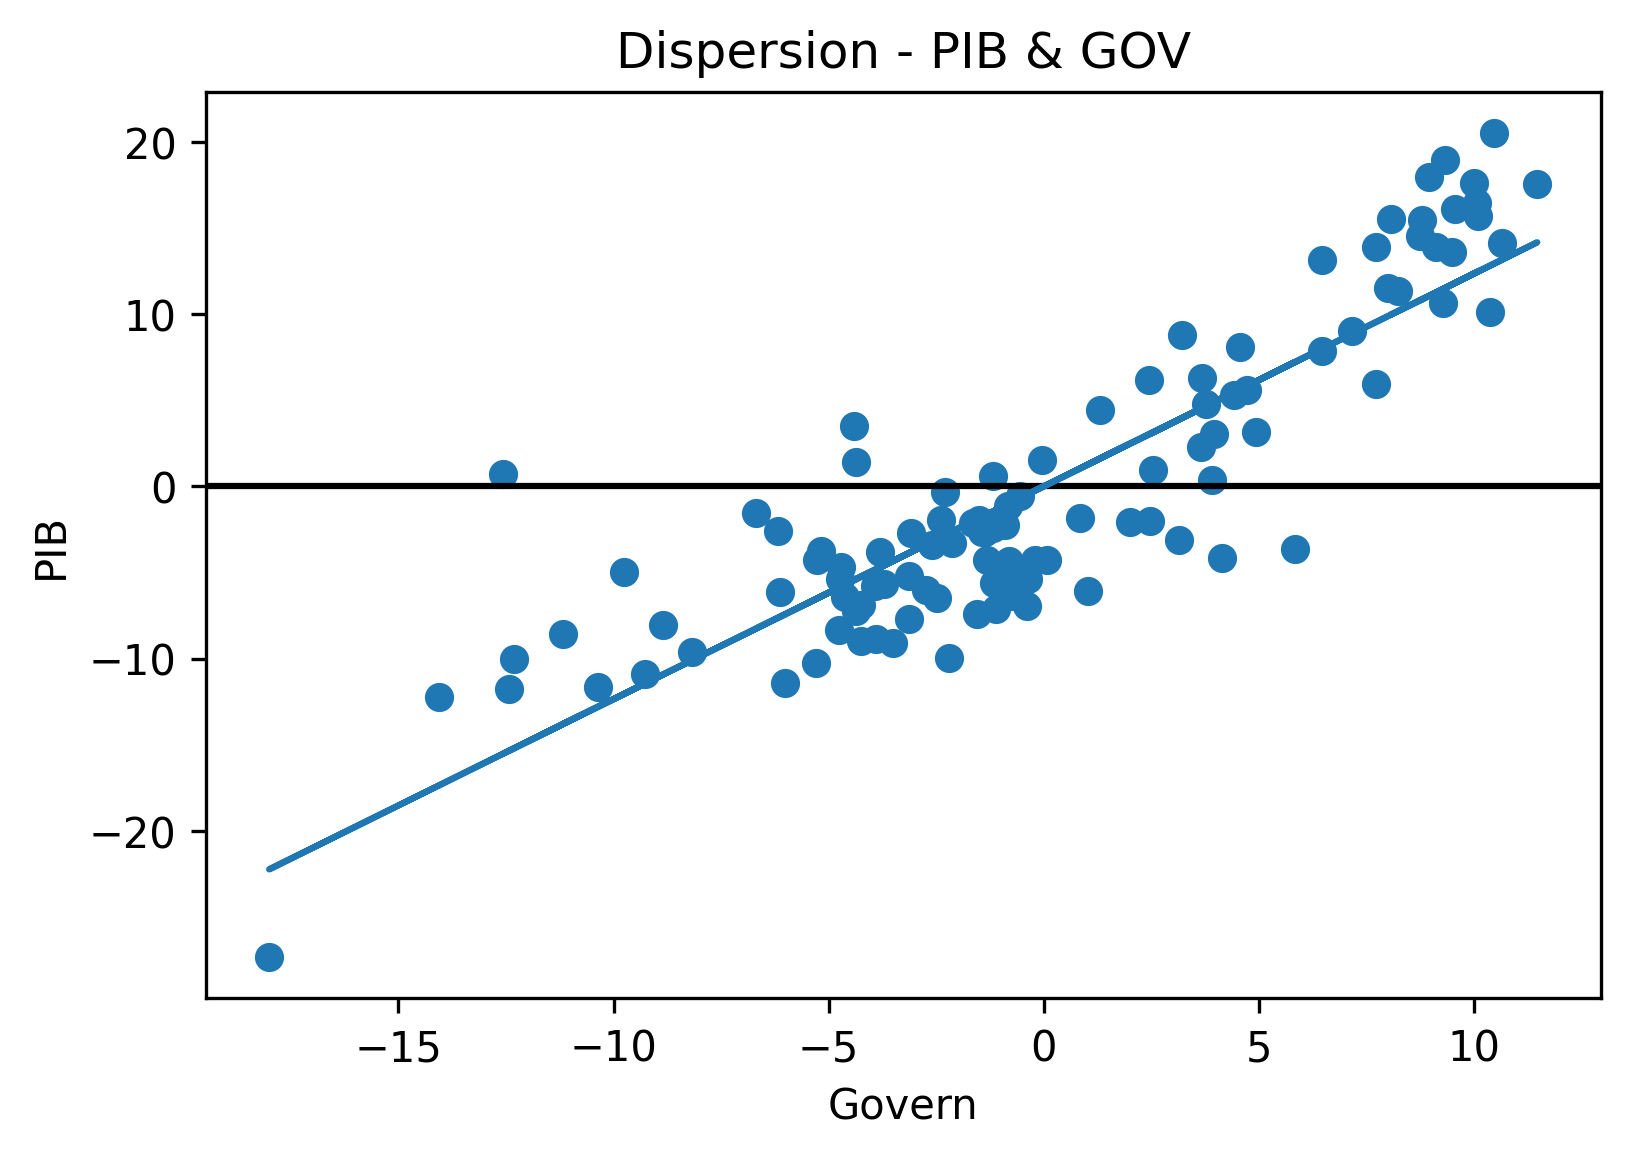

In [33]:
# Scatter Govern, PIB - Cycle
fig = plt.figure(dpi=300)
plt.title("Dispersion - PIB & GOV")
plt.ylabel("PIB")
plt.xlabel("Govern")
plt.axhline(0,color="black")
plt.scatter(finalBase["Governo-Cycle"],finalBase["PIB-Cycle"])
p2 = np.poly1d(np.polyfit(finalBase["Governo-Cycle"], finalBase["PIB-Cycle"], 1))
plt.plot(finalBase["Governo-Cycle"],p2(finalBase["Governo-Cycle"]))
plt.show()

O gasto do governo Brasileiro parece ser prociclico em relação ao PIB